# ELEC 474: Prelab 4

By Matthieu Roux, Student Number: 20013052

## 0 Imports and set up

In [18]:
import numpy as np
import cv2
from numpy.core.fromnumeric import size
import matplotlib.pyplot as plt


backpack_left_url = "backpack_left.png"
backpack_right_url = "backpack_right.png"
lena_url = "lena.png"

img_arr = [
    cv2.cvtColor(cv2.imread(backpack_left_url), cv2.COLOR_BGR2GRAY),
    cv2.cvtColor(cv2.imread(backpack_right_url), cv2.COLOR_BGR2GRAY),
    cv2.cvtColor(cv2.imread(lena_url), cv2.COLOR_BGR2GRAY),
]

## 1.1 SIFT Matching

Press 'x' to close all windows

In [19]:
my_SIFT_instance = cv2.SIFT_create()
kp_array = [my_SIFT_instance.detectAndCompute(img, None) for img in img_arr]

drawn_kp_arr = [np.zeros((img.shape[0], img.shape[1], 3)) for img in img_arr]
for i in range(len(img_arr)):
    drawn_kp_arr[i] = cv2.drawKeypoints(
        image=img_arr[i],
        keypoints=kp_array[i][0],
        outImage=drawn_kp_arr[i],
    )

# Rendering
window_names = ["left", "right", "lena"]
for name in window_names:
    cv2.namedWindow(name)

while True:
    # Wait a little bit for the image to re-draw
    key = cv2.waitKey(5)
    for name, show_img in zip(window_names, drawn_kp_arr):
        cv2.imshow(name, show_img)

    # If an x is pressed, the window will close
    if key == ord("x"):
        break
cv2.destroyAllWindows()

In [20]:
## Sometimes it helps to run this if pressing 'x' does not destroy all windows
cv2.destroyAllWindows()

In [21]:

def compute_matches(des1, des2):
    bf = cv2.BFMatcher()
    return bf.knnMatch(des1, des2, k=2)


def apply_ratio(
    left_img_prop,
    right_img_prop,
    matches,
    threshold_ratio=0.5,
    filter_matches=False,
):
    draw_matches = matches
    # Apply ratio test if needed
    if filter_matches:
        draw_matches = get_filtered_matches(matches, threshold_ratio)

    # cv2.drawMatchesKnn expects list of lists as matches.
    left_img, left_kp = left_img_prop
    right_img, right_kp = right_img_prop
    return cv2.drawMatchesKnn(
        left_img, left_kp, right_img, right_kp, draw_matches, None, flags=2
    )


# putting keypoints in variabels for better legibility
left_kp, left_des = kp_array[0]
right_kp, right_des = kp_array[1]
lena_kp, lena_des = kp_array[2]

backpack_matches = compute_matches(left_des, right_des)
backpack_output_img = apply_ratio(
    (img_arr[0], left_kp), (img_arr[1], right_kp), backpack_matches
)

lena_matches = compute_matches(lena_des, lena_des)
lena_output_img = apply_ratio(
    (img_arr[2], lena_kp), (img_arr[2], lena_kp), lena_matches
)


# Rendering 2
backpack_window_name = "backpack matches"
lena_window_name = "lena matches"
cv2.namedWindow(backpack_window_name)
cv2.namedWindow(lena_window_name)


while True:
    # Wait a little bit for the image to re-draw
    key = cv2.waitKey(5)
    cv2.imshow(backpack_window_name, backpack_output_img)
    cv2.imshow(lena_window_name, lena_output_img)

    # If an x is pressed, the window will close
    if key == ord("x"):
        break
cv2.destroyAllWindows()

In [22]:
cv2.destroyAllWindows()

## Lowe's Ratio Test

Press 'x' to close all windows

In [23]:
def get_filtered_matches(matches, threshold_ratio=0.5):
    return [[m] for m, n in matches if m.distance < threshold_ratio * n.distance]
    
# Display Lowe's Filtered Images
backpack_output_img = apply_ratio(
    (img_arr[0], left_kp),
    (img_arr[1], right_kp),
    backpack_matches,
    filter_matches=True,
)

lena_output_img = apply_ratio(
    (img_arr[2], lena_kp),
    (img_arr[2], lena_kp),
    lena_matches,
    filter_matches=True,
)


# Rendering 2
backpack_window_name = "backpack lowe matches"
lena_window_name = "lena lowe matches"
cv2.namedWindow(backpack_window_name)
cv2.namedWindow(lena_window_name)


while True:
    # Wait a little bit for the image to re-draw
    key = cv2.waitKey(5)
    cv2.imshow(backpack_window_name, backpack_output_img)
    cv2.imshow(lena_window_name, lena_output_img)

    # If an x is pressed, the window will close
    if key == ord("x"):
        break
cv2.destroyAllWindows()

## 1.3 Histogram
On the left will be the distances of the backpack histogram and the right, of Lena

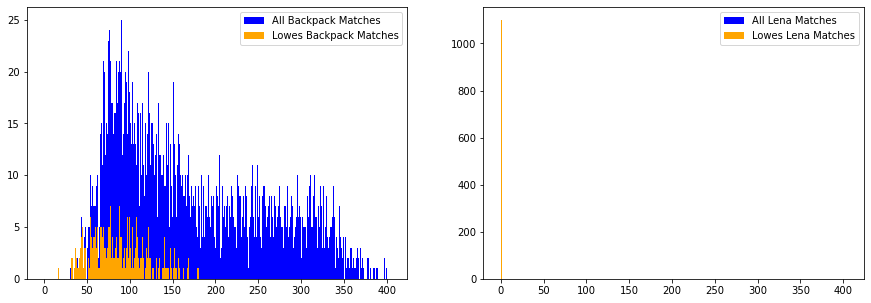

In [24]:

def get_max_distance(matches):
    max_val = 0
    index = 0
    max_index = 0
    for match in matches:
        index += 1
        if match[0].distance > max_val:
            max_val = match[0].distance
            max_index = index
    return int(max_val)

max_range = get_max_distance(backpack_matches)

# Get backpack distances
backpack_matches_dist = [match[0].distance for match in backpack_matches]

filtered_backpack_matches_dist = [
    match[0].distance for match in get_filtered_matches(backpack_matches)
]

# Get lena distances
lena_matches_dist = [match[0].distance for match in lena_matches]

filtered_lena_matches_dist = [
    match[0].distance for match in get_filtered_matches(lena_matches)
]

# Plot Backpack Histogram
plt.figure(figsize=(15, 5), num="Distance Histograms")
plt.subplot(1, 2, 1)
plt.hist(
    backpack_matches_dist,
    bins=np.arange(0, max_range),
    facecolor="blue",
    label="All Backpack Matches",
)
plt.hist(
    filtered_backpack_matches_dist,
    bins=np.arange(0, max_range),
    facecolor="orange",
    label="Lowes Backpack Matches",
)
plt.legend()

# Plot Lena Histogram
plt.subplot(1, 2, 2)
plt.hist(
    lena_matches_dist,
    bins=np.arange(0, max_range),
    facecolor="blue",
    label="All Lena Matches",
)
plt.hist(
    filtered_lena_matches_dist,
    bins=np.arange(0, max_range),
    facecolor="orange",
    label="Lowes Lena Matches",
)
plt.legend()

plt.show()

## Conclusion

First of all we notice that the Lena histogram has an equal number amount of Match and Lowe's matches and that they all have a distance of 0. This would have been expected since we are comparing two identical images so all feature detected one the first image are the same as the ones detected in the second image, and all the matches are perfect.

Then looking at the backpack histogram we notice that as expected there are less Lowe's matches than total matches, but what's important to notice is that we only kept matches with low distances, and left out _most_ of the matches with a distance over 200. This is because those matches were perhaps incorrect and were therefore removed.
We conclude that the Lowe's technique did work overall and removed a lot of incorrect matches, keeping most of the low distance matches and removing the bad, high distance matches.